In [34]:
import pandas as pd
df = pd.read_csv("bank.csv")
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [35]:
df[len(df)-11:]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9989,15605622,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [37]:
df.drop("customer_id", axis=1, inplace=True)

In [38]:
df = pd.get_dummies(df, columns=['country','gender'], drop_first=True)

In [39]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [40]:
Y = df['churn']
X = df.drop('churn', axis=1)


In [41]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)


LogisticRegression()

In [44]:
Y_pred = LR.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
print(f"{confusion_matrix(Y_test,Y_pred)}")

[[1568   49]
 [ 318   65]]


In [46]:
TP, FN, FP, TN = confusion_matrix(Y_test,Y_pred).ravel()

In [47]:
TP, FN, FP, TN

(1568, 49, 318, 65)

In [48]:
#calculate precision using the formula
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*precision*recall/(precision+recall)

In [49]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {F1}")

Precision: 0.8313891834570519
Recall: 0.9696969696969697
F1: 0.8952326577219526


In [91]:
def get_metrics(Y_test, Y_pred):
    TP, FN, FP, TN = confusion_matrix(Y_test,Y_pred).ravel()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2*precision*recall/(precision+recall)
    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    return precision, recall, F1, Accuracy


def find(size):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=size)
    LR = LogisticRegression()
    pred = LR.fit(X_train,Y_train).predict(X_test)
    precision, recall, F1,accuracy = get_metrics(Y_test, pred)

    return {
        'precision': precision,
        'recall': recall,
        'F1': F1,
        'accuracy': accuracy
        
    }
    



In [92]:
result = {}
for i in range(2,10,1):
    result[i] = find(i/10)


In [93]:
ans = pd.DataFrame(result).T
ans

,precision,recall,F1,accuracy
2,0.799182,0.984887,0.882370,0.791500
3,0.805155,0.973007,0.881158,0.789333
4,0.800926,0.979862,0.881404,0.790500
5,0.795077,0.981763,0.878613,0.785800
6,0.806379,0.976205,0.883203,0.793833
7,0.798677,0.980339,0.880233,0.788714
8,0.801831,0.977062,0.880816,0.789625
9,0.803362,0.973901,0.880449,0.789444


<AxesSubplot:>

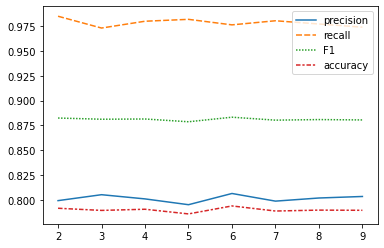

In [94]:
import seaborn as sns
sns.lineplot(data=ans)